In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('PBL5recommendationdata.csv',encoding='iso-8859-1')

In [3]:
#pip install pandas_profiling

In [4]:
#import pandas_profiling
#df.profile_report()

In [33]:
df.head(4)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.000000
1,3,John,Smith,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,0.800838,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,0.876336
2,3,John,Smith,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.000000,9.95,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.000000
3,4,James,Anderson,1386780263,1437762646,0.0,29,4,James,Anderson,29,USD,19.56,0.000000,9.95,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,sub-product-deta

In [6]:
df.shape

(4194, 181)

In [7]:
# df de içinde hiç veri olmayan veya çok az sayıda veri bulunan sutunlar bulunduğundan bu sutunlar df den kaldırılması gerekmektedir.  
df_total_data=pd.DataFrame(df.isnull().sum()) 
df_total_data 

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3467
Customers.create_date,0
...,...
Products.leg_style,4194
Products.seat_size,4032
Products.family_id,325
Products.saved_status,264


In [8]:
less_data_table=df_total_data[df_total_data[0]>1000] #1000 den az verisi olan tablolar çıkartılacaktır.

In [9]:
less_data_table

,0
Customers.company,3467
Customers.status,4093
Customers.mailing,2080
Customers.reminders,4194
Customers.tax_exempt,4189
...,...
Products.material,3392
Products.arm_style,4039
Products.leg_style,4194
Products.seat_size,4032


In [10]:
for i in less_data_table.index:
    df.drop(i,axis=1,inplace=True)

In [11]:
pd.DataFrame(df.isnull().sum()).head(10)

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.create_date,0
Customers.last_modified,0
Customers.customer_type,423
Orders.id,0
Orders.customer_id,0
Orders.fname,0
Orders.lname,0


In [12]:
df.shape

(4194, 67)

In [13]:
#object boş değerler ortalamar ile dolduruldu
for i in df.select_dtypes(include=np.object):
    df[i].fillna(df[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [14]:
#sayısal boş değerler ortalamar ile dolduruldu
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [15]:
df.isnull().sum()

Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.last_modified          0
Customers.customer_type          0
Orders.id                        0
Orders.customer_id               0
Orders.fname                     0
Orders.lname                     0
Orders.order_number              0
Orders.currency                  0
Orders.subtotal                  0
Orders.tax                       0
Orders.shipping                  0
Orders.total                     0
Orders.shipping_carrier          0
Orders.shipping_method           0
Orders.tracking                  0
Orders.payment_status            0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.updated_date              0
Orders.shipped_date 

In [16]:
x=pd.get_dummies(df,drop_first=True)

In [19]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
preds=[]
def clust(clusters,x):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
        preds.append(pred)

In [20]:
clust(10,x)

Number of cluster 2, silhouette 0.6285252292108297
Number of cluster 3, silhouette 0.5633842460114455
Number of cluster 4, silhouette 0.49230292689467664
Number of cluster 5, silhouette 0.48384390448359377
Number of cluster 6, silhouette 0.5024961968628144
Number of cluster 7, silhouette 0.46201315077584254
Number of cluster 8, silhouette 0.5078981002363663
Number of cluster 9, silhouette 0.5008838764400386
Number of cluster 10, silhouette 0.506819147192711


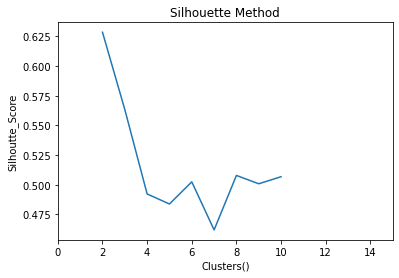

In [21]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

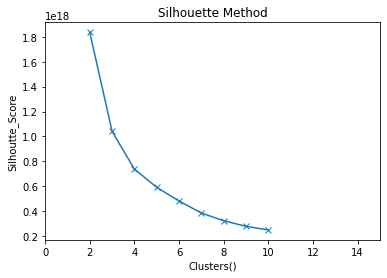

In [22]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [23]:
#5. cluster i seçtim
pred=preds[4]

In [34]:
result=pd.DataFrame()
result["Customers.id"]=df["Customers.id"]
result["Customer"]=df["Customers.fname"]+" "+df["Customers.lname"]
result["Cluster"]=pred

In [35]:
result

,Customers.id,Customer,Cluster
0,797,Christy Dill,5
1,3,John Smith,0
2,3,John Smith,4
3,4,James Anderson,0
4,5,Abraham Pollak,0
...,...,...,...
4189,3730,Nora Fontana,3
4190,3732,Kennithe Tecora,3
4191,3733,Tinna Randall,3
4192,3735,HALIMAH SHAHID,3


No handles with labels found to put in legend.


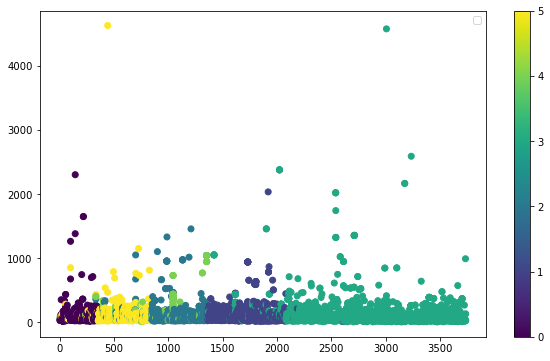

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(y=x["Orders.total"],x=x["Customers.id"],c=pred)
plt.legend()
plt.colorbar()
plt.show()